
Resultado das métricas de Desempenho:
MSE dataset Original: 0.53
R²  dataset Original: 0.81
RMSE dataset Original: 0.73
MAE  dataset Original: 0.58


Gráfico de Dispersão em Preto e Branco - Dataset com 1.000.000 dados (BRUTO TRATAMENTO):


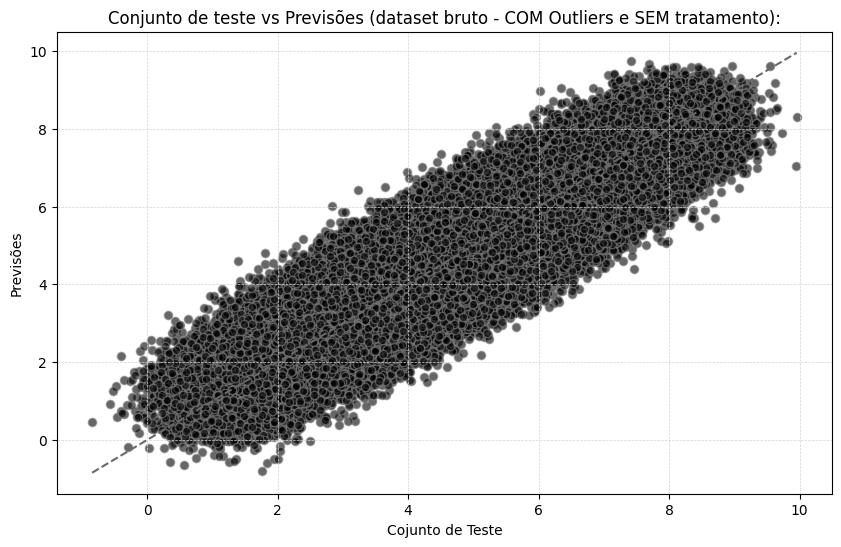

In [3]:
# 1º Teste - Usando o Dataset Original, contendo cerca de 1.000.000 (Um milhão) de dados registrados;
# Única manipulação é a transformação das colunas categóricas em dummies/binárias
# Verificando as métricas de Desempenho: MAE, MSE, RMSE e R2
# Também é gerado um gráfico ilustrando a dispersão Linear da primeira versão do modelo

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Carregando o dataset do Kaggle
df = pd.read_csv('crop_yield.csv')

# Transformando as colunas categóricas em variáveis dummies
df = pd.get_dummies(df, columns=['Region', 'Soil_Type', 'Crop', 'Weather_Condition'])

# Separando as variáveis independentes e a variável dependente
X = df.drop('Yield_tons_per_hectare', axis=1) # Independentes
y = df['Yield_tons_per_hectare'] # Dependente

# Dividindo o dataset em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo de árvore de decisão
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

# Avaliando o modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'\nResultado das métricas de Desempenho:')
print(f'MSE dataset Original: {mse:.2f}')
print(f'R²  dataset Original: {r2:.2f}')
print(f'RMSE dataset Original: {rmse:.2f}')
print(f'MAE  dataset Original: {mae:.2f}')

print(f'\n') # Separador

# Visualização: Gráfico de Dispersão em Preto e Branco - Dataset com 1.000.000 dados (BRUTO TRATAMENTO)
plt.figure(figsize=(10, 6))

# Plotando os pontos em preto
plt.scatter(y_test, y_pred, color='black', alpha=0.6, edgecolor='gray', marker='o')

# Adicionando a linha y = x em cinza escuro
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='dimgray')

plt.xlabel('Cojunto de Teste')
plt.ylabel('Previsões')
plt.title('Conjunto de teste vs Previsões (dataset bruto - COM Outliers e SEM tratamento):')

# Definindo a grade em cinza claro
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
print(f'Gráfico de Dispersão em Preto e Branco - Dataset com 1.000.000 dados (BRUTO TRATAMENTO):')
plt.show()


Resultado das métricas de Desempenho:
MSE Sem outliers: 0.5163 
Com Outliers: 0.5238

R² Sem outliers: 0.8210 
Com Outliers: 0.8201

RMSE Sem outliers: 0.7186 
Com Outliers: 0.7238

MAE Sem outliers: 0.5737 
Com Outliers: 0.5785


GRÁFICO DEMONSTRANDO A RELAÇÃO LINEAR - Dataset com 100.000 dados (COM Outliers e SEM melhorias):


<Figure size 1000x600 with 0 Axes>

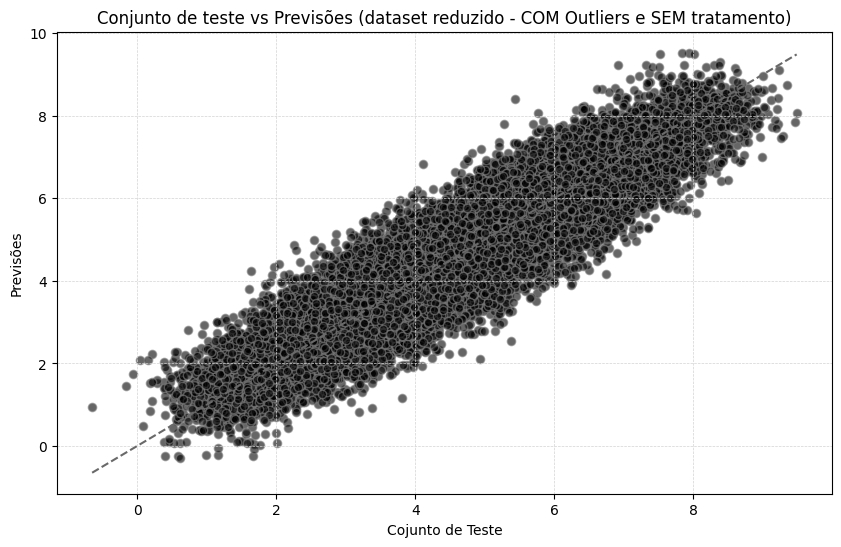



GRÁFICO DEMONSTRANDO A RELAÇÃO LINEAR - Dataset com 100.000 dados (SEM Outliers e SEM melhorias):


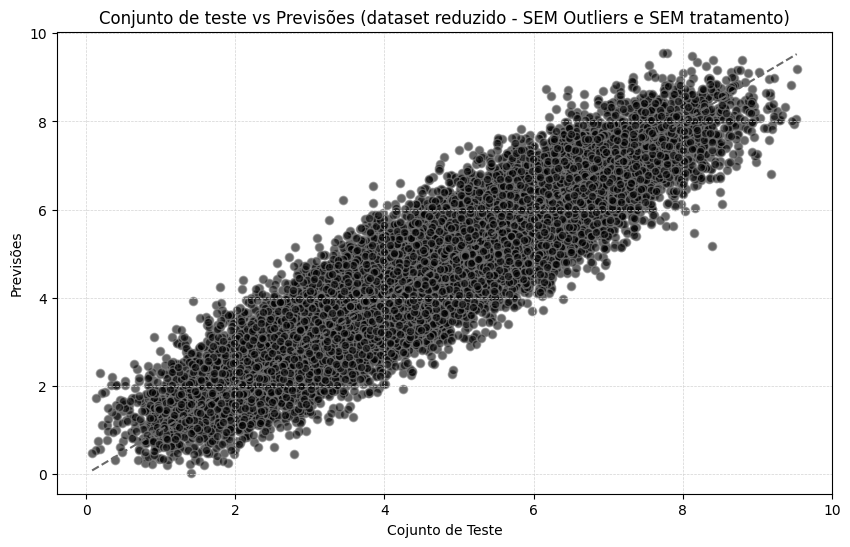

In [ ]:
# 2º Teste - Utilizando o Dataset após Amostragem Estratificada, contendo cerca de 100.000 (Cem mil) dados registrados;
# Verificando o modelo COM e SEM Outliers
# Verificando as métricas de Desempenho: MAE, MSE, RMSE e R2
# Também é gerado um gráfico ilustrando a dispersão Linear da segunda versão do modelo criado

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Carregando o dataset do Kaggle Após o Processo de Amostragem Estratificada
df = pd.read_csv('crop_yield_sampled.csv')

# Transformando as colunas categóricas em variáveis dummies
df = pd.get_dummies(df, columns=['Region', 'Soil_Type', 'Crop', 'Weather_Condition'])

# Calculando os quartis (Q1 e Q3) para a variável 'Yield_tons_per_hectare'
Q1 = df['Yield_tons_per_hectare'].quantile(0.25)
Q3 = df['Yield_tons_per_hectare'].quantile(0.75)
IQR = Q3 - Q1

# Definindo os limites inferior e superior para os dados
limite_inferior = Q1 - 3.0 * IQR
limite_superior = Q3 + 3.0 * IQR

# Filtrando os dados para remover os outliers
df1 = df[(df['Yield_tons_per_hectare'] >= limite_inferior) & (df['Yield_tons_per_hectare'] <= limite_superior)]

# Removendo linhas onde 'Yield_tons_per_hectare' é menor que 0
df1 = df1[df1['Yield_tons_per_hectare'] >= 0]

# Separando as variáveis independentes e a variável dependente
X = df.drop('Yield_tons_per_hectare', axis=1)  # Variáveis indepentendes do Dataset com outliers
y = df['Yield_tons_per_hectare']  # Variável Alvo dependente - Dataset com outliers

X1 = df1.drop('Yield_tons_per_hectare', axis=1)  # Variáveis indepentendes do Dataset sem outliers
y1 = df1['Yield_tons_per_hectare']  # Variável Alvo dependente - Dataset sem outliers

# Dividindo o dataset em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Treinando o modelo de árvore de decisão
model = DecisionTreeRegressor(random_state=42)
model1 = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
model1.fit(X_train1, y_train1)

# Fazendo previsões
y_pred = model.predict(X_test)
y_pred1 = model1.predict(X_test1)

# Avaliando o modelo
mae = mean_absolute_error(y_test, y_pred)
mae1 = mean_absolute_error(y_test1, y_pred1)
mse = mean_squared_error(y_test, y_pred)
mse1 = mean_squared_error(y_test1, y_pred1)
rmse = np.sqrt(mse)
rmse1 = np.sqrt(mse1)
r2 = r2_score(y_test, y_pred)
r21 = r2_score(y_test1, y_pred1)

# Exibindo os Resultados:
print(f'\nResultado das métricas de Desempenho:')
print(f'MSE Sem outliers: {mse1:.4f} \nCom Outliers: {mse:.4f}\n')
print(f'R² Sem outliers: {r21:.4f} \nCom Outliers: {r2:.4f}\n')
print(f'RMSE Sem outliers: {rmse1:.4f} \nCom Outliers: {rmse:.4f}\n')
print(f'MAE Sem outliers: {mae1:.4f} \nCom Outliers: {mae:.4f}')

print(f'\n') # Separador

# GRÁFICO DEMONSTRANDO A RELAÇÃO LINEAR - Dataset com 100.000 dados (COM Outliers e SEM melhorias)
plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))

# Plotando os pontos em preto
plt.scatter(y_test, y_pred, color='black', alpha=0.6, edgecolor='gray', marker='o')

# Adicionando a linha y = x em cinza escuro
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='dimgray')
 
plt.xlabel('Cojunto de Teste')
plt.ylabel('Previsões')
plt.title('Conjunto de teste vs Previsões (dataset reduzido - COM Outliers e SEM tratamento)')

# Definindo a grade em cinza claro
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
print(f'GRÁFICO DEMONSTRANDO A RELAÇÃO LINEAR - Dataset com 100.000 dados (COM Outliers e SEM melhorias):')
plt.show()

print(f'\n') # Separador

# GRÁFICO DEMONSTRANDO A RELAÇÃO LINEAR - Dataset com 100.000 dados (SEM Outliers e SEM melhorias)
plt.figure(figsize=(10, 6))

# Plotando os pontos em preto
plt.scatter(y_test1, y_pred1, color='black', alpha=0.6, edgecolor='gray', marker='o')

# Adicionando a linha y = x em cinza escuro
plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)], linestyle='--', color='dimgray')
 
plt.xlabel('Cojunto de Teste')
plt.ylabel('Previsões')
plt.title('Conjunto de teste vs Previsões (dataset reduzido - SEM Outliers e SEM tratamento)')

# Definindo a grade em cinza claro
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
print(f'GRÁFICO DEMONSTRANDO A RELAÇÃO LINEAR - Dataset com 100.000 dados (SEM Outliers e SEM melhorias):')
plt.show()


Resultado das métricas de Desempenho:
MSE Sem Outliers: 0.27
R² Sem Outliers: 0.91
RMSE Sem Outliers: 0.52
MAE Sem Outliers: 0.41

Melhores parâmetros encontrados: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
MSE médio com validação cruzada:  0.2664606501827794


GRÁFICO DEMONSTRANDO A IMPORTÂNCIA DAS VARIÁVEIS:


<Figure size 1000x600 with 0 Axes>

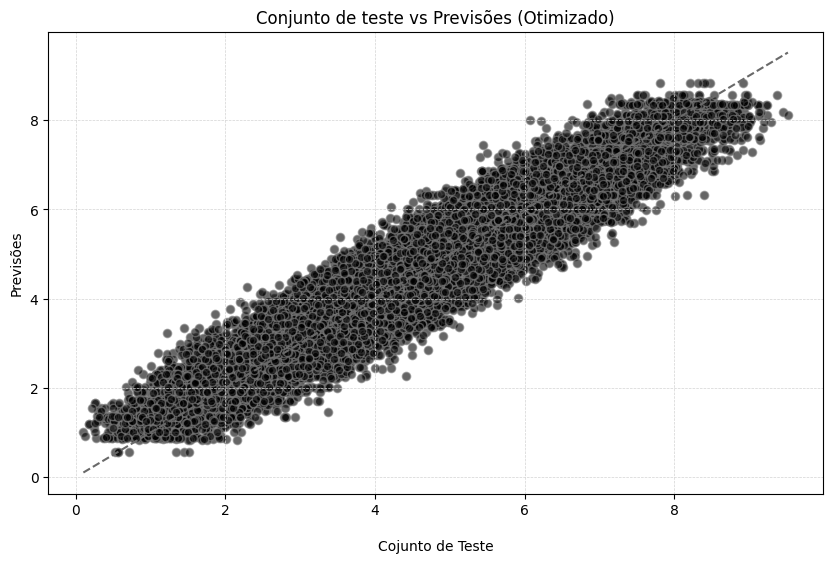



TABELA MOSTRANDO A IMPORTÂNCIA DAS VARIÁVEIS:

                Variável  Importância
0           Rainfall_mm     0.639953
2       Fertilizer_Used     0.212744
3       Irrigation_Used     0.134585
1   Temperature_Celsius     0.010224
4       Days_to_Harvest     0.000995
15          Crop_Barley     0.000138
18            Crop_Rice     0.000128
9      Soil_Type_Chalky     0.000107
17           Crop_Maize     0.000102
12      Soil_Type_Peaty     0.000094


GRÁFICO MONSTRANDO A IMPORTÂNCIA DAS VARIÁVEIS:


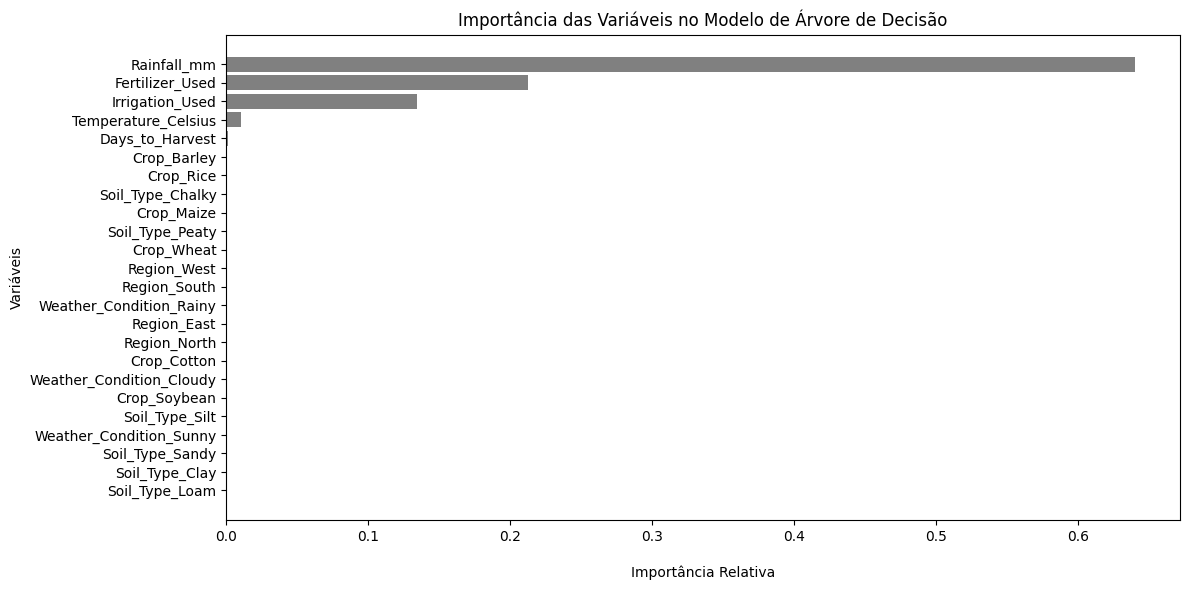



Tabela comparando o Conjunto de Teste (Valor Real) com a previsão do Modelo:

       Valor Real  Valor Previsto  Diferenca em Pontos  Margem de Erro (%)
38910    5.593787        5.434603             0.159184            2.845733
579      5.561166        5.721038            -0.159872            2.874784
72367    7.226636        7.522519            -0.295882            4.094327
27489    4.090851        4.391450            -0.300600            7.348100
88053    4.034822        4.221497            -0.186675            4.626603
...           ...             ...                  ...                 ...
45951    4.494672        4.927712            -0.433039            9.634500
85447    3.144771        3.707483            -0.562712           17.893573
18758    2.635296        3.134606            -0.499310           18.947018
26220    3.003560        3.426717            -0.423157           14.088504
43221    5.012430        4.884306             0.128124            2.556125

[100 rows x 4 colum

In [7]:
# 3º Teste (final) - Utilizando o Dataset após Amostragem Estratificada, contendo cerca de 100.000 (Cem mil) dados registrados;
# Verificando o modelo SEM Outliers;
# Modelo Otimizado (Validação Cruzada, Poda e etc)
# Verificando as métricas de Desempenho: MAE, MSE, RMSE e R2
# Também é gerado um gráfico ilustrando a dispersão Linear da última versão do modelo criado
# Bem como foi ilustrado a importância das variáveis que influenciam a previsão do modelo
# E por fim, testando a previsão do modelo e comparando com os valores reais (conjunto de teste)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Carregando o dataset
df = pd.read_csv('crop_yield_sampled.csv')

# Criando variáveis dummies para colunas categóricas
df = pd.get_dummies(df, columns=['Region', 'Soil_Type', 'Crop', 'Weather_Condition'])

# Calcular os quartis (Q1 e Q3) para a variável 'Yield_tons_per_hectare'
Q1 = df['Yield_tons_per_hectare'].quantile(0.25)
Q3 = df['Yield_tons_per_hectare'].quantile(0.75)
IQR = Q3 - Q1

# Definir os limites inferior e superior para os dados
limite_inferior = Q1 - 3.0 * IQR
limite_superior = Q3 + 3.0 * IQR

# Filtrando os dados para remover os outliers
df = df[(df['Yield_tons_per_hectare'] >= limite_inferior) & (df['Yield_tons_per_hectare'] <= limite_superior)]

# Remover linhas onde 'Yield_tons_per_hectare' é menor que 0
df = df[df['Yield_tons_per_hectare'] >= 0]

# Limitar valores muito pequenos
df = df[df['Yield_tons_per_hectare'] > 0.1]  # Remover valores muito pequenos (menor que 0.01)


# Separar as variáveis independentes e a variável dependente
X = df.drop('Yield_tons_per_hectare', axis=1)
y = df['Yield_tons_per_hectare']

# Dividir o dataset em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Treinar o modelo de árvore de decisão
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Parâmetros a serem ajustados
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search para encontrar os melhores hiperparâmetros
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=10)
grid_search.fit(X_train, y_train)

# Melhor modelo após Grid Search
best_model = grid_search.best_estimator_

# Fazer previsões
y_pred = best_model.predict(X_test)

# Avaliar o modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Printando os resultados
print(f'\nResultado das métricas de Desempenho:')
print(f'MSE Sem Outliers: {mse:.2f}')
print(f'R² Sem Outliers: {r2:.2f}')
print(f'RMSE Sem Outliers: {rmse:.2f}')
print(f'MAE Sem Outliers: {mae:.2f}\n')
print("Melhores parâmetros encontrados:", grid_search.best_params_)

scores = cross_val_score(best_model, X, y, scoring='neg_mean_squared_error', cv=5)
print("MSE médio com validação cruzada: ", -np.mean(scores))

print(f'\n') # Separador

# GRÁFICO DEMONSTRANDO A RELAÇÃO LINEAR - Dataset com 100.000 dados (SEM Outliers e COM melhorias - Validação Cruzada)
plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))

# Plotando os pontos em preto
plt.scatter(y_test, y_pred, color='black', alpha=0.6, edgecolor='gray', marker='o')

# Adicionando a linha y = x em cinza escuro
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='dimgray')
 
plt.xlabel('\nCojunto de Teste')
plt.ylabel('Previsões')
plt.title('Conjunto de teste vs Previsões (Otimizado)')

# Definindo a grade em cinza claro
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
print(f'GRÁFICO DEMONSTRANDO A IMPORTÂNCIA DAS VARIÁVEIS:')
plt.show()

print(f'\n') # Separador

# Gerando a tabela com a importância das Variáveis
importancia_variaveis = best_model.feature_importances_

# Criar um DataFrame para organizar os dados
df_importancia = pd.DataFrame({
    'Variável': X.columns,
    'Importância': importancia_variaveis
}).sort_values(by='Importância', ascending=False)

# Exibir as 10 variáveis mais importantes
print(f'TABELA MOSTRANDO A IMPORTÂNCIA DAS VARIÁVEIS:')
print('\n', df_importancia.head(10))

print(f'\n') # Separador

# Gráfico da Importância das Variáveis

plt.figure(figsize=(12, 6))
plt.barh(df_importancia['Variável'], df_importancia['Importância'], color='gray')
plt.xlabel('\nImportância Relativa')
plt.ylabel('Variáveis')
plt.title('Importância das Variáveis no Modelo de Árvore de Decisão')
plt.gca().invert_yaxis()
plt.tight_layout()
print(f'GRÁFICO MONSTRANDO A IMPORTÂNCIA DAS VARIÁVEIS:')
plt.show()

# Comparação entre o conjunto de teste e a previsão do modelo
df_comparacao = pd.DataFrame({
    'Valor Real': y_test,
    'Valor Previsto': y_pred,
    'Diferenca em Pontos': y_test - y_pred,
})

print(f'\n') # Separador

# Calculando a margem de erro (%)
df_comparacao['Margem de Erro (%)'] = abs(df_comparacao['Diferenca em Pontos']) / df_comparacao['Valor Real'] * 100

# Calcular a média da diferença em pontos e da margem de erro
media_diferenca_pontos = df_comparacao['Diferenca em Pontos'].mean()
media_margem_erro = df_comparacao['Margem de Erro (%)'].mean()

# Mostrar o DataFrame de comparação
print(f'Tabela comparando o Conjunto de Teste (Valor Real) com a previsão do Modelo:\n')
print(df_comparacao.head(100))  # Para ver os primeiros 5 resultados

# Mostrar as médias
print(f'\nMédia da Diferença em Pontos: {media_diferenca_pontos:.4f}')
print(f'Média da Margem de Erro (%): {media_margem_erro:.4f}')